# Descripción del modelo

**Contexto:** De la base de datos de datos abiertos de Bogotá donde vamos a contemprlar los motivos de llamada de la linea 123.

****

Vamos a predecir cual va a ser la cantidad de incidentes.

1. Por año
2. Por mes
****


# Importar los datos

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [4]:
llamadas123 = pd.read_csv('C:/Users/jpmcm/OneDrive/Escritorio/Mejoraremos el mundo/llamadastramitadas-c4-bogota_numerounicodeseguridadyemergencias-nuse_linea-123-a-31052024.csv', sep=';')
llamadas123

,ID,ANIO,MES,TIPO_INCIDENTE,TIPO_DETALLE,COD_LOCALIDAD,LOCALIDAD,COD_UPZ,UPZ,CANT_INCIDENTES
0,20240599UPZ999VHMALE,2024,5,VHMALE,VEHÍCULO MAL ESTACIONADO,99,SIN LOCALIZACION,UPZ999,SIN LOCALIZACION,55
1,20240599UPZ999DELINF,2024,5,DELINF,DELITOS INFORMÁTICOS,99,SIN LOCALIZACION,UPZ999,SIN LOCALIZACION,4
2,20240599UPZ999BROMA,2024,5,BROMA,BROMA,99,SIN LOCALIZACION,UPZ999,SIN LOCALIZACION,130
3,20240599UPZ999992,2024,5,992,ACCIDENTE DE AVIACIÓN,99,SIN LOCALIZACION,UPZ999,SIN LOCALIZACION,2
4,20240599UPZ999978,2024,5,978,HALLAZGO DE EXPLOSIVOS,99,SIN LOCALIZACION,UPZ999,SIN LOCALIZACION,1
...,...,...,...,...,...,...,...,...,...,...
890958,20150101UPR1943,2015,1,943,MOVILIDAD / SEÑALIZACIÓN,1,USAQUÉN,UPR1,UPR ZONA NORTE,2
890959,20150101UPR1942H,2015,1,942H,ACCIDENTE TRÁNSITO CON HERIDOS/MUERTOS,1,USAQUÉN,UPR1,UPR ZONA NORTE,5
890960,20150101UPR1934,2015,1,934,RIÑA,1,USAQUÉN,UPR1,UPR ZONA NORTE,1
890961,20150101UPR1916,2015,1,916,PERSONA O VEHÍCULO SOSPECHOSO,1,USAQUÉN,UPR1,UPR ZONA NORTE,1


In [6]:
llamadas123_col_tomadas = llamadas123[['ANIO', 'MES', 'TIPO_DETALLE', 'LOCALIDAD', 'UPZ', 'CANT_INCIDENTES']]

In [8]:
llamadas123_2024 = llamadas123_col_tomadas.copy()

llamadas123_2024 = llamadas123_2024[llamadas123_2024['ANIO'] ==  2024]

In [49]:
llamadas123_2024 = llamadas123_2024[['ANIO', 'MES', 'TIPO_DETALLE', 'LOCALIDAD', 'CANT_INCIDENTES']]

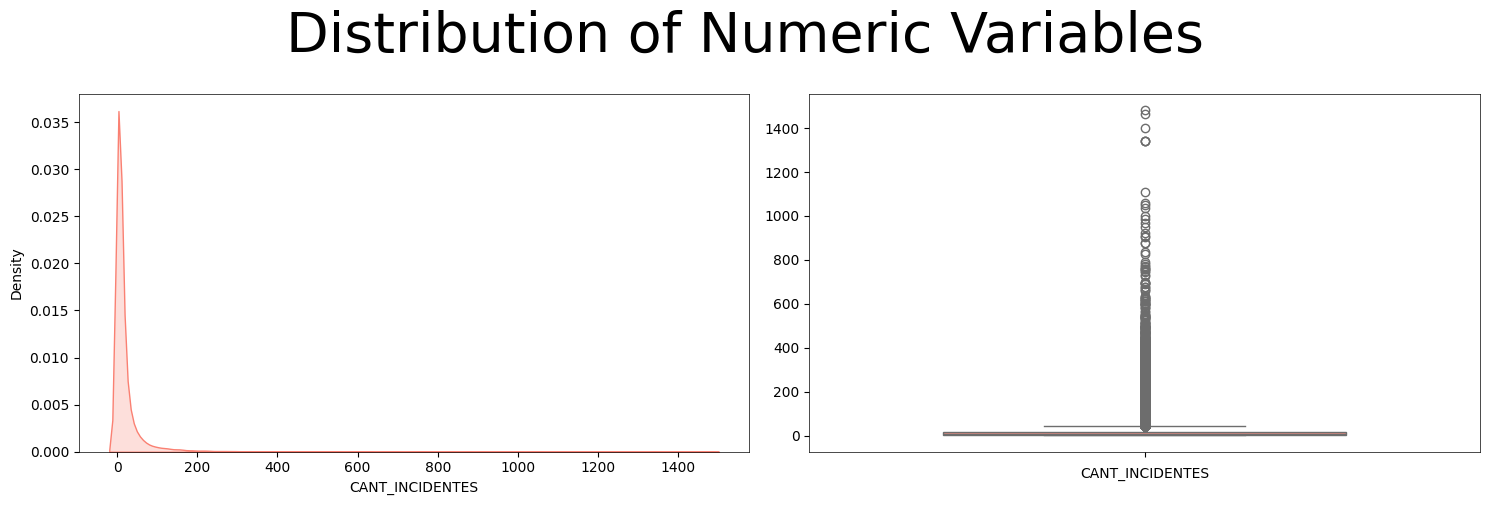

In [27]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1,2,1 )
sns.kdeplot(llamadas123_2024['CANT_INCIDENTES'], color='salmon', fill=True)
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)
ax1.set_xlabel('CANT_INCIDENTES')
ax1.grid(False)

ax2 = plt.subplot(1,2,2)
sns.boxplot(y=llamadas123_2024['CANT_INCIDENTES'], color='salmon', width=0.6, linewidth=1)
for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(0.5)
ax2.set_xlabel('CANT_INCIDENTES')
ax2.set_ylabel('')
ax2.grid(False)

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

In [19]:
llamadas123_2024.describe()

,ANIO,MES,CANT_INCIDENTES
count,38730.0,38730.000000,38730.000000
mean,2024.0,3.022592,21.922928
std,0.0,1.410935,57.060483
min,2024.0,1.000000,1.000000
25%,2024.0,2.000000,2.000000
50%,2024.0,3.000000,6.000000
75%,2024.0,4.000000,18.000000
max,2024.0,5.000000,1481.000000


In [35]:
cat_cols = ['TIPO_DETALLE','LOCALIDAD']

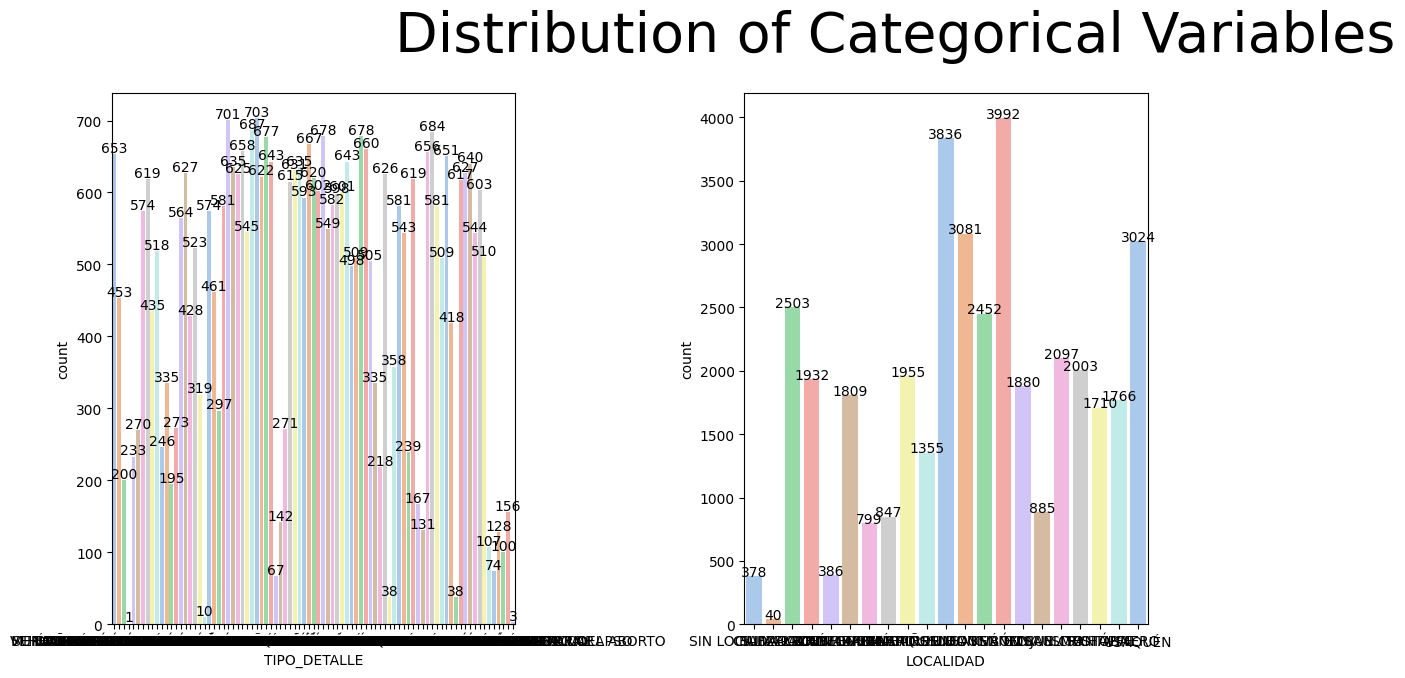

In [36]:
# Distribution of categorical variables
plt.figure(figsize=(18, 24))
plotnumber = 1

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=llamadas123_2024[col], data=llamadas123_2024, palette='pastel')

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(col)
        # plt.xticks(rotation=45)
        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

In [31]:
tipo_detalle_valores = llamadas123_2024['TIPO_DETALLE'].value_counts(ascending=False)

In [33]:
tipo_detalle_valores.head(12)

TIPO_DETALLE
RIÑA                                      703
ACCIDENTE DE TRÁNSITO                     701
VERIFICAR SITUACIÓN                       687
MALTRATO                                  684
PERSONA O VEHÍCULO SOSPECHOSO             678
HURTO EN PROCESO                          678
RUIDO                                     677
NARCÓTICOS                                667
HURTO EFECTUADO                           660
ANIMAL                                    658
INCONSCIENTE O PARO CARDIORESPIRATORIO    656
VEHÍCULO MAL ESTACIONADO                  653
Name: count, dtype: int64

In [39]:
localidades_valores = llamadas123_2024['LOCALIDAD'].value_counts(ascending=False)

In [40]:
localidades_valores.head(10)

LOCALIDAD
KENNEDY               3992
SUBA                  3836
ENGATIVÁ              3081
USAQUÉN               3024
CIUDAD BOLÍVAR        2503
FONTIBÓN              2452
USME                  2097
SAN CRISTÓBAL         2003
TEUSAQUILLO           1955
RAFAEL URIBE URIBE    1932
Name: count, dtype: int64

In [50]:
datos_filtrados = llamadas123_2024.copy()

detalles_interes = [
    'RIÑA',
    'ACCIDENTE DE TRÁNSITO',
    'MALTRATO',
    'PERSONA O VEHÍCULO SOSPECHOSO',
    'HURTO EN PROCESO',
    'RUIDO',
    'NARCÓTICOS',
    'HURTO EFECTUADO',
    'INCONSCIENTE O PARO CARDIORESPIRATORIO',
    'VEHÍCULO MAL ESTACIONADO'
]

# Filtrar el DataFrame
datos_filtrados = datos_filtrados[datos_filtrados['TIPO_DETALLE'].isin(detalles_interes)]

localidades_interes = [
    'KENNEDY',              
    'SUBA',                  
    'ENGATIVÁ',              
    'USAQUÉN',               
    'CIUDAD BOLÍVAR',        
    'FONTIBÓN',              
    'USME',                  
    'SAN CRISTÓBAL',         
    'TEUSAQUILLO',           
    'RAFAEL URIBE URIBE' 
]

datos_filtrados = datos_filtrados[datos_filtrados['LOCALIDAD'].isin(localidades_interes)]

In [51]:
datos_filtrados = datos_filtrados.reset_index()
datos_filtrados

,index,ANIO,MES,TIPO_DETALLE,LOCALIDAD,CANT_INCIDENTES
0,87,2024,5,VEHÍCULO MAL ESTACIONADO,CIUDAD BOLÍVAR,9
1,102,2024,5,ACCIDENTE DE TRÁNSITO,CIUDAD BOLÍVAR,146
2,108,2024,5,RIÑA,CIUDAD BOLÍVAR,428
3,110,2024,5,RUIDO,CIUDAD BOLÍVAR,134
4,117,2024,5,NARCÓTICOS,CIUDAD BOLÍVAR,39
...,...,...,...,...,...,...
4661,38703,2024,1,PERSONA O VEHÍCULO SOSPECHOSO,USAQUÉN,22
4662,38710,2024,1,HURTO EN PROCESO,USAQUÉN,12
4663,38711,2024,1,HURTO EFECTUADO,USAQUÉN,9
4664,38720,2024,1,INCONSCIENTE O PARO CARDIORESPIRATORIO,USAQUÉN,7


In [52]:
# def feature_data(df):
#     cat_cols = ['TIPO_DETALLE',	'LOCALIDAD']
#     #onehotEncoding
#     df=pd.get_dummies(df,columns=cat_cols)
#     return df

In [53]:
datos_filtrados = feature_data(datos_filtrados)

In [58]:
datos_filtrados['CANT_INCIDENTES'] = datos_filtrados.pop('CANT_INCIDENTES')

In [63]:
# datos_filtrados.drop(columns={'index'},inplace=True)
datos_filtrados

,ANIO,MES,TIPO_DETALLE_ACCIDENTE DE TRÁNSITO,TIPO_DETALLE_HURTO EFECTUADO,TIPO_DETALLE_HURTO EN PROCESO,TIPO_DETALLE_INCONSCIENTE O PARO CARDIORESPIRATORIO,TIPO_DETALLE_MALTRATO,TIPO_DETALLE_NARCÓTICOS,TIPO_DETALLE_PERSONA O VEHÍCULO SOSPECHOSO,TIPO_DETALLE_RIÑA,...,LOCALIDAD_ENGATIVÁ,LOCALIDAD_FONTIBÓN,LOCALIDAD_KENNEDY,LOCALIDAD_RAFAEL URIBE URIBE,LOCALIDAD_SAN CRISTÓBAL,LOCALIDAD_SUBA,LOCALIDAD_TEUSAQUILLO,LOCALIDAD_USAQUÉN,LOCALIDAD_USME,CANT_INCIDENTES
0,2024,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,9
1,2024,5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,146
2,2024,5,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,428
3,2024,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,134
4,2024,5,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,2024,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,22
4662,2024,1,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,12
4663,2024,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,9
4664,2024,1,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,7


In [64]:
datos_filtrados = datos_filtrados[['MES','CANT_INCIDENTES']]

In [67]:
datos_filtrados['MES'].value_counts()

MES
5    944
2    943
3    934
4    933
1    912
Name: count, dtype: int64